In [3]:
import h5py
data = h5py.File('TRAAAAW128F429D538.h5', 'r')
#another file: TRAAAAW128F429D538.h5

In [4]:
songs_metadata=data['metadata']['songs']
print(songs_metadata[0])
#columns:
# 0- analyzer_version
# 1- artist_7digitalid
# 2- artist_familiarity
# 3- artist_hotness
# 4- artist_id
# 5- artist_latitude
# 6- artist_location
# 7- artist_longitude
# 8- artist_mbid
# 9- artist_name
# 10- artist_playmeid
# 11- genre
# 12- id_artist_terms
# 13- idx_similar_artists
# 14- release
# 15- release_7digitalid
# 16- song_hotttnesss
# 17- song_id
# 18- title
# 19- track_7digitalid
print(songs_metadata[0][11])
songs_musicbrainz = data['musicbrainz']['songs']
#print(songs_musicbrainz[0])
#columns:
# 0- ?
# 1- Year

(b'', 165270, 0.58179377, 0.40199754, b'ARD7TVE1187B99BFB1', nan, b'California - LA', nan, b'e77e51a5-4761-45b3-9847-2051f811e366', b'Casual', 4479, b'', 0, 0, b'Fear Itself', 300848, 0.60211999, b'SOMZWCG12A8C13C480', b"I Didn't Mean To", 3401791)
b''


In [5]:
analysis_data = data['analysis']
#since analysis is another group, it will behave as a dictionary,
#so again we check the keys
analysis_data.keys()
analysis_data_songs = data['analysis']['songs']

tmp = analysis_data_songs[0]
print(len(tmp))
print(tmp)
# Which is danceability?
analysis_data.keys()


31
(22050, b'a222795e07cd65b7a530f1346f520649', 0., 218.93179, 0.247, 0., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.736, -11.197, 0, 0.636, 218.932, 92.198, 4, 0.778, b'TRAAAAW128F429D538')


<KeysViewHDF5 ['bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre', 'songs', 'tatums_confidence', 'tatums_start']>

In [6]:
import os
 
# assign directory
main_directory = 'MillionSongSubset'
oldest_song_name = ''
oldest_song_age = 2010
oldest_song_artist = ''
newest_song_name = ''
newest_song_age = 0
newest_song_artist = ''

# iterate over files in that directory
for root, dirs, files in os.walk(main_directory):
    for filename in files:
        f = h5py.File(os.path.join(root, filename), 'r')
        songs_musicbrainz=f['musicbrainz']['songs']
        songs_metadata=f['metadata']['songs']
        song_name = songs_metadata[0][18].decode('UTF-8')
        artist_name = songs_metadata[0][9].decode('UTF-8')
        year = songs_musicbrainz[0][1]
        if year != 0:
            if year < oldest_song_age:
                oldest_song_age = year
                oldest_song_name = song_name
                oldest_song_artist = artist_name
            if year > newest_song_age:
                newest_song_age = year
                newest_song_name = song_name
                newest_song_artist = artist_name

print("Oldest Song in sample is ", oldest_song_name + ", made by " + oldest_song_artist)
print("Oldest age: ",oldest_song_age)
print("Newest song in sample is " + newest_song_name + ", made by " + newest_song_artist)
print("Newest age: ",newest_song_age)


Oldest Song in sample is  Ma Rainey's Black Bottom, made by Ma Rainey
Oldest age:  1927
Newest song in sample is Walls And Cannonballs (Album), made by Sister Hazel
Newest age:  2010


In [10]:
# get interesing values to analyse
import pandas as pd
import os

# Create the pandas DataFrame with column name is provided explicitly
df = pd.DataFrame(columns=['Song title','Artist','Year','Hotness of song'])
main_directory = 'MillionSongSubset'

for root, dirs, files in os.walk(main_directory):
    for filename in files:
        f = h5py.File(os.path.join(root, filename), 'r')
        songs_musicbrainz = f['musicbrainz']['songs']
        songs_metadata = f['metadata']['songs']
        song_name = songs_metadata[0][18].decode('UTF-8')
        artist_name = songs_metadata[0][9].decode('UTF-8')
        year = songs_musicbrainz[0][1]
        # genre = songs_metadata[0][11].decode('UTF-8') This does not exist
        song_hotttnesss = songs_metadata[0][16]
        if songs_musicbrainz[0][1] != 0:
            new_row = {'Song title':song_name, 'Artist':artist_name, 'Year':year, 'Hotness of song':song_hotttnesss}
            df = df.append(new_row, ignore_index=True)
            

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)
/tmp/ipykernel_67235/2432217979.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [11]:
df.head()

,Song title,Artist,Year,Hotness of song
0,Compulsory Resurrection,Abysmal Dawn,2008,0.538200
1,Party Til The Cows Come Home,Elvin Bishop,2005,0.405116
2,Into A Swan,Siouxsie,2007,0.590241
3,Citizen Of The Planet,Simon & Garfunkel,2004,0.419674
4,Shooting Stars,Cauterize,2003,0.714329


In [12]:
df.sort_values(by=['Year'])
df.head()

,Song title,Artist,Year,Hotness of song
0,Compulsory Resurrection,Abysmal Dawn,2008,0.538200
1,Party Til The Cows Come Home,Elvin Bishop,2005,0.405116
2,Into A Swan,Siouxsie,2007,0.590241
3,Citizen Of The Planet,Simon & Garfunkel,2004,0.419674
4,Shooting Stars,Cauterize,2003,0.714329


<Axes: xlabel='Year', ylabel='Hotness of song'>

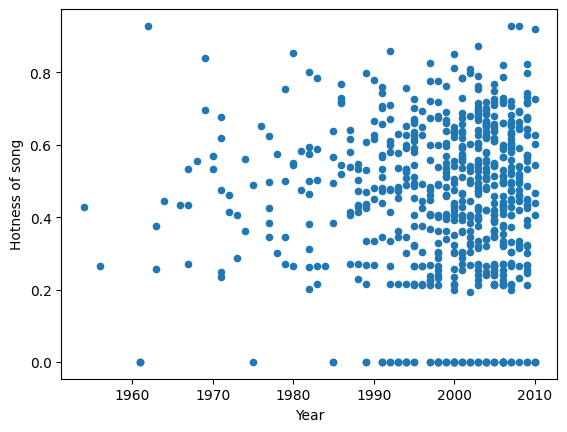

In [15]:
import matplotlib.pyplot as plt
df.plot(x ='Year', y='Hotness of song', kind='scatter')

Text(0, 0.5, 'Nr of songs')

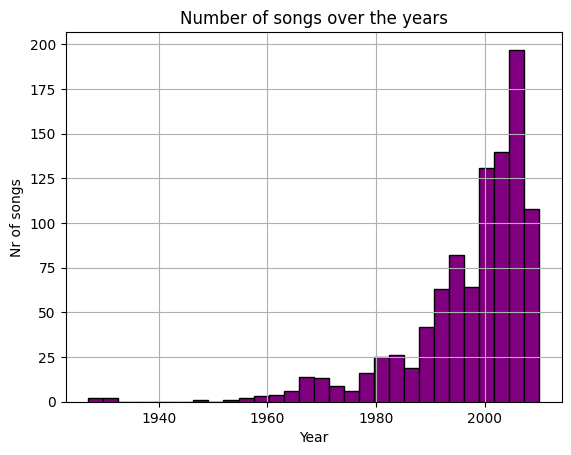

In [35]:
df['Year'].hist(bins=30, edgecolor='black', range=[1927, 2010], color='purple')
plt.title('Number of songs over the years')
plt.xlabel('Year')
plt.ylabel('Nr of songs')